# Pinkbike Downhill Fantasy League Analysis
## Setup
#### Import Libraries

If you do not have these libraries available, you should install them using `pip`

In [359]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
sns.set_style('whitegrid')

Finally found UCI online riders list

http://uci.ch/mountain-bike/teams/

Config

In [502]:
event = 'dh'
race = 2
gender = 'f'
topX = 10
splits = 5 # Could detect this from dataset, or or they always 5? @todo
image_gen = True
dpi = 300

In [503]:
from config import races

racename = races[race]['name']
raceName = races[race]['title']
chart_title_prefix = raceName + ( ', Men' if gender == 'm' else ', Women' )

directory = event + str(race) + '_' + racename
file_prefix = event + str(race) + '_' + racename + '_' + gender
file_prefix = os.path.join( directory, file_prefix )

In [504]:
df = pd.read_csv( file_prefix + '.merged.csv', index_col=0 )
dl = pd.read_csv( 'pinkbike_fantasy_costs_' + gender + '.csv' )

dfl = df.merge( dl, left_on='uci', right_on='uci', how='inner' )

In [505]:
dlen = len( df['status'].dropna() )
if topX > dlen:
    topX = dlen

In [506]:
dfl.head()

,bib,id,name_x,q_rank,q_speed,q_split1,q_split2,q_split3,q_split4,q_split5,q_start,q_start_rev,q_status,uci,q_points,r_points,rank,speed,split1,split2,split3,split4,split5,start,start_rev,status,points,qr_diff,q_split1_rank,q_split1_vs_best,q_split1_vs_winner,q_split2_rank,q_split2_vs_best,q_split2_vs_winner,q_split2_sector,q_split2_sector_rank,q_split2_sector_vs_best,q_split2_sector_vs_winner,q_split3_rank,q_split3_vs_best,q_split3_vs_winner,q_split3_sector,q_split3_sector_rank,q_split3_sector_vs_best,q_split3_sector_vs_winner,q_split4_rank,q_split4_vs_best,q_split4_vs_winner,q_split4_sector,q_split4_sector_rank,q_split4_sector_vs_best,q_split4_sector_vs_winner,q_split5_rank,q_split5_vs_best,q_split5_vs_winner,q_split5_sector,q_split5_sector_rank,q_split5_sector_vs_best,q_split5_sector_vs_winner,split1_rank,split1_vs_best,split1_vs_winner,split2_rank,split2_vs_best,split2_vs_winner,split2_sector,split2_sector_rank,split2_sector_vs_best,split2_sector_vs_winner,split3_rank,split3_vs_best,split3_vs_winner,split3_sector,split3_sector_rank,split3_sector_vs_best,split3_sector_vs_winner,split4_rank,split4_vs_best,split4_vs_winner,split4_sector,split4_sector_rank,split4_sector_vs_best,split4_sector_vs_winner,split5_rank,split5_vs_best,split5_vs_winner,split5_sector,split5_sector_rank,split5_sector_vs_best,split5_sector_vs_winner,speed_ms,speed_ms_vs_best,speed_rank,q_speed_rank,BirthDate,CategoryCode,FamilyName,GivenName,Id,Nation,Outfit,PrintName,RaceId,RaceNr,ScoreboardName,StartOrder,StartTime,UciCode,UciRank,UciRiderId,UciTeamCode,UciTeamId,UciTeamName,WorldCupRank,Age,name_y,cost
0,3,2003,SEAGRAVE Tahnee,3,50.77,65.784,215.552,244.961,286.927,316.908,3,21,Finished,10007414016,30.0,200.0,1.0,52.20,64.814,211.338,240.134,281.291,310.960,14.0,3.0,Finished,230.0,-5.948,3.0,1.053,0.000,3.0,8.073,0.000,149.768,4.0,7.020,0.000,3.0,8.342,0.000,29.409,3.0,0.305,0.000,3.0,9.283,0.000,41.966,4.0,1.844,0.000,3.0,9.083,0.000,29.981,2.0,0.059,0.000,1.0,0.000,0.000,1.0,0.000,0.000,146.524,1.0,0.000,0.000,1.0,0.000,0.000,28.796,1.0,0.000,0.000,1.0,0.000,0.000,41.157,2.0,0.034,0.000,1.0,0.000,0.000,29.669,1.0,0.000,0.000,14.500000,0.000000,3.0,3.0,1995-06-15T00:00:00,WE,SEAGRAVE,Tahnee,1196990205528240,GBR,NaN,SEAGRAVE Tahnee,0,3,SEAGRAVE T,3,48660000,GBR19950615,2,10007414016,FMD,1863,TRANSITION BIKES / MUC-OFF FACTORY RACING,3,22,Tahnee Seagrave,600000
1,1,2001,NICOLE Myriam,2,50.45,64.731,207.479,236.619,278.295,309.765,1,23,Finished,10004535237,40.0,160.0,2.0,50.72,65.404,216.908,247.122,288.983,319.211,15.0,2.0,Finished,200.0,9.446,1.0,0.000,-1.053,1.0,0.000,-8.073,142.748,1.0,0.000,-7.020,1.0,0.000,-8.342,29.140,2.0,0.036,-0.269,2.0,0.651,-8.632,41.676,2.0,1.554,-0.290,2.0,1.940,-7.143,31.470,8.0,1.548,1.489,3.0,0.590,0.590,2.0,5.570,5.570,151.504,5.0,4.980,4.980,2.0,6.988,6.988,30.214,4.0,1.418,1.418,2.0,7.692,7.692,41.861,4.0,0.738,0.704,2.0,8.251,8.251,30.228,7.0,0.559,0.559,14.088889,0.411111,8.0,5.0,1990-02-08T00:00:00,WE,NICOLE,Myriam,1196990205528238,FRA,WCL,NICOLE Myriam,0,1,NICOLE M,1,48600000,FRA19900208,1,10004535237,CVN,1590,COMMENCAL / VALLNORD,1,28,Myriam Nicole,625000
2,2,2002,ATHERTON Rachel,1,50.61,64.790,208.081,237.522,277.644,307.825,2,22,Finished,10003434487,50.0,140.0,3.0,49.81,65.120,218.276,247.811,289.281,320.016,16.0,1.0,Finished,190.0,12.191,2.0,0.059,-0.994,2.0,0.602,-7.471,143.291,2.0,0.543,-6.477,2.0,0.903,-7.439,29.441,4.0,0.337,0.032,1.0,0.000,-9.283,40.122,1.0,0.000,-1.844,1.0,0.000,-9.083,30.181,3.0,0.259,0.200,2.0,0.306,0.306,3.0,6.938,6.938,153.156,8.0,6.632,6.632,3.0,7.677,7.677,29.535,2.0,0.739,0.739,3.0,7.990,7.990,41.470,3.0,0.347,0.313,3.0,9.056,9.056,30.735,11.0,1.066,1.066,13.836111,0.663889,11.0,4.0,1987-12-06T00:00:00,WE,ATHERTON,Rachel,1196990205528239,GBR,NCh,ATHERTON Rachel,0,2,ATHERTON R,2,48630000,GBR19871206,6,10003434487,TDH,1598,TREK FACTORY RACING DH,2,30,Rachel Atherton,675000
3,4,2004,CABIROU Marine,6,49.30,69.122,219.452,248.975,291.874,322.750,4,20,Finished,10009563069,16.0,125.0,4.

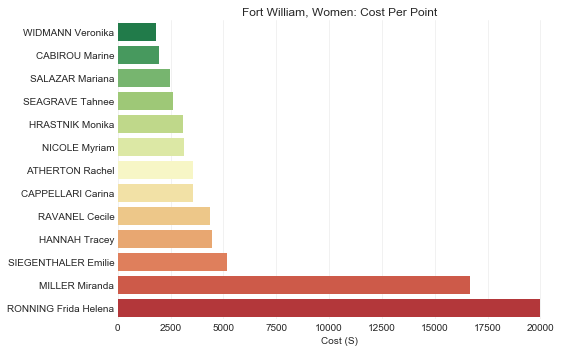

In [507]:
cnt = len( dfl[dfl.points > 0] )

dfl['dpp'] = dfl['cost']/dfl['points']
data = dfl.sort_values( 'dpp', ascending=True )

plt.figure(figsize=(8,10 if 'm' == gender else 5))
plot = sns.barplot( data['dpp'][:cnt], data['name_x'][:cnt], palette='RdYlGn_r' ) #, palette=colors )

sns.despine()
plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
plot.set( title=chart_title_prefix + ': Cost Per Point', xlabel='Cost (S)', ylabel='' )

plt.tight_layout()

if image_gen:
    plt.savefig( file_prefix + '_cost_per_point.png', dpi=dpi )

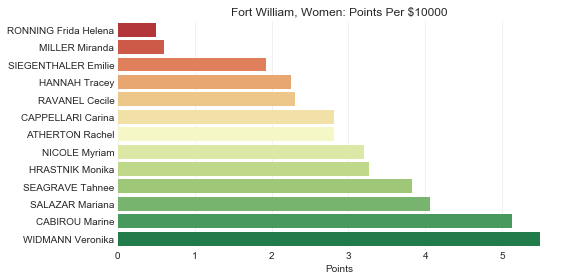

In [508]:
dfl['ppd'] = dfl['points'] / (dfl['cost']/10000)
data = dfl[:cnt].sort_values( 'ppd', ascending=True )

plt.figure(figsize=(8,10 if 'm' == gender else 4))
plot = sns.barplot( data['ppd'], data['name_x'], palette='RdYlGn' ) #, palette=colors )

sns.despine()
plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
plot.set( title=chart_title_prefix + ': Points Per $10000', xlabel='Points', ylabel='' )
# plot.invert_xaxis()

plt.tight_layout()

if image_gen:
    plt.savefig( file_prefix + '_points_per_dollar.png', dpi=dpi )

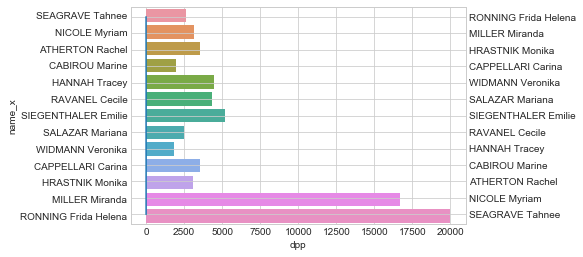

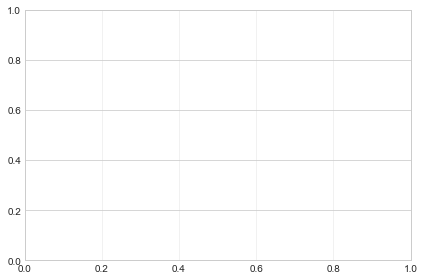

In [509]:
# Attempt to combine

cnt = len( dfl[dfl.points > 0] )

dfl['dpp'] = dfl['cost']/dfl['points']
dfl['ppd'] = dfl['points'] / (dfl['cost']/10000)

fig, ax = plt.subplots()

# plt.figure(figsize=(8,10 if 'm' == gender else 5))
sns.barplot( x='dpp', y='name_x', data=dfl[:cnt], ax=ax ) #, palette=colors )

ax2 = ax.twinx()

# plot1 = sns.barplot( dfl['ppd'][:cnt], dfl['name_x'][:cnt], ax=ax2 ) #, palette=colors )
ax2.plot( dfl['ppd'][:cnt], dfl['name_x'][:cnt] ) #, palette=colors )
# plot1.invert_xaxis()

plt.show()

sns.despine()
# plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
# plot.set( title=chart_title_prefix + ': Cost Per Point', xlabel='Cost (S)', ylabel='' )

plt.tight_layout()

In [514]:
dfx = df[['name', 'points', 'rank', 'WorldCupRank', 'UciRank', 'start_rev']].copy().dropna()
dfx['UciPerf'] = round( dfx['UciRank'] / dfx['points'], 2 )
dfx['UciRankPerf'] = round( dfx['UciRank'] / dfx['rank'], 2 )
dfx['RacePerf'] = dfx['start_rev'] / dfx['points']
dfx['RaceRankPerf'] = dfx['start_rev'] / dfx['rank']
dfx['WcRankPerf'] = dfx['WorldCupRank'] / dfx['rank']
# dfx['dpp'] = round( dfx['cost']/dfx['points'], 2 )
# dfx['ppd'] = round( dfx['points'] / (dfx['cost']/10000), 2 )

In [515]:
dfx.sort_values( 'UciRankPerf', ascending=False ).head()

,name,points,rank,WorldCupRank,UciRank,start_rev,UciPerf,UciRankPerf,RacePerf,RaceRankPerf,WcRankPerf
6,CURD Katy,80.0,7.0,9,53,10.0,0.660000,7.57,0.125000,1.428571,1.285714
5,RAVANEL Cecile,115.0,6.0,5,38,5.0,0.330000,6.33,0.043478,0.833333,0.833333
12,A'HERN Sian,35.0,13.0,0,35,11.0,1.000000,2.69,0.314286,0.846154,0.000000
15,MOLLOY Tegan,0.0,16.0,0,40,16.0,inf,2.50,inf,1.000000,0.000000
8,SALAZAR Mariana,65.0,9.0,10,22,9.0,0.340000,2.44,0.138462,1.000000,1.111111


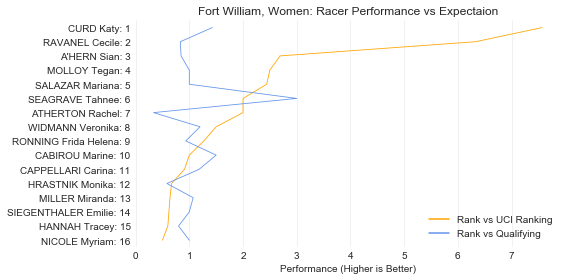

In [517]:
data = dfx.sort_values( 'UciRankPerf', ascending=False ).reset_index( drop=True )

# ylabels = [ str(i+1) + ' ' + name + ' (' + str(data['UciRank'][i]) + '/' + str(data['rank'][i])[:-2] + ')' for i, name in enumerate( data['name'] ) ]
ylabels = [ name + ': ' + str(i+1) for i, name in enumerate( data['name'] ) ]
cols = [ 'orange', 'cornflowerblue', 'green', 'red' ]

plt.figure(figsize=(8,10 if 'm' == gender else 4))
for idx, col in enumerate( [ 'UciRankPerf', 'RaceRankPerf' ] ):
    plot = sns.pointplot( data[col], data['name'], scale=0.3, color=cols[idx], markers='' )

leg1 = mlines.Line2D( [], [], color=cols[0], marker='', markersize=10, label='Rank vs UCI Ranking', linestyle='-' )
leg2 = mlines.Line2D( [], [], color=cols[1], marker='', markersize=10, label='Rank vs Qualifying', linestyle='-' )
plt.legend( handles=[leg1, leg2] )

sns.despine()
plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
plot.set( title=chart_title_prefix + ': Racer Performance vs Expectaion', xlabel='Performance (Higher is Better)', ylabel='' )
plot.set_yticklabels( ylabels )

plt.tight_layout()

if image_gen:
    plt.savefig( file_prefix + '_finals_performance.png', dpi=dpi )

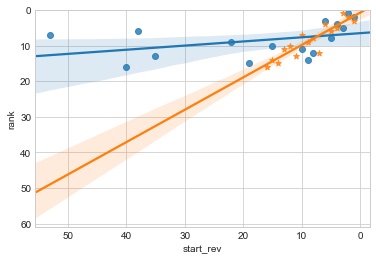

In [513]:
plot1 = sns.regplot( data['UciRank'], data['rank'], marker='o' )
plot2 = sns.regplot( data['start_rev'], data['rank'], marker='*' )
plt.ylim( 0, 61 )
plot1.invert_xaxis()
plot1.invert_yaxis()
